# Linear Regression Demo
by Eugenia Duncan

In [42]:
import pandas as pd
from numpy import *
from sklearn import linear_model
import matplotlib.pyplot as plt

from matplotlib import rcParams, rc
import seaborn as sb

In [43]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 6
sb.set_style('whitegrid')

In [44]:
#Note:
#y = mx + b
#m is slope, b is y-intercept

In [45]:
#Linear Regression using the Method of Least Squares
#using the predictable
#test data
#which outputs the exact line y = 2x - 2

x = [0, 3, 1]
y = [-2, 4, 0]

n = len(x)
sum_x = sum(i for i in x)
sum_y= sum(i for i in y)
sum_x2 = sum(i**2 for i in x)

sum_xy = 0
for i in range(n):
    r = x[i] * y[i]
    sum_xy = sum([sum_xy, r])

avg_x = 0
avg_y = 0
if n != 0: avg_x = sum_x/n
if n != 0: avg_y = sum_y/n

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - (sum_x)**2)

b = avg_y - m * avg_x

print("The number of points, n, is {}.".format(n))
print("sum_x = {}".format(sum_x))
print("sum_y = {}".format(sum_y))
print("sum_x2 = {}".format(sum_x2))
print("sum_xy = {}".format(sum_xy))	
print("x_bar = {}".format(avg_x))
print("y_bar = {}".format(avg_y))
print("calculated slope, m = {}".format(m))
print("calculated y-int, b = {}".format(b))

The number of points, n, is 3.
sum_x = 4
sum_y = 2
sum_x2 = 10
sum_xy = 12
x_bar = 1.3333333333333333
y_bar = 0.6666666666666666
calculated slope, m = 2.0
calculated y-int, b = -2.0


In [46]:
#Linear Regression using the Method of Least Squares
#using all of the
#actual data
#which outputs the estimated line y = (4/3)x - (4/3)

x = [0, 3, 1, 1, 3, 1]
y = [-2, 4, 0, 2, 1, -1]

n = len(x)
sum_x = sum(i for i in x)
sum_y= sum(i for i in y)
sum_x2 = sum(i**2 for i in x)

sum_xy = 0
for i in range(n):
    r = x[i] * y[i]
    sum_xy = sum([sum_xy, r])

avg_x = 0
avg_y = 0
if n != 0: avg_x = sum_x/n
if n != 0: avg_y = sum_y/n

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - (sum_x)**2)

b = avg_y - m * avg_x

print("The number of points, n, is {}.".format(n))
print("sum_x = {}".format(sum_x))
print("sum_y = {}".format(sum_y))
print("sum_x2 = {}".format(sum_x2))
print("sum_xy = {}".format(sum_xy))	
print("x_bar = {}".format(avg_x))
print("y_bar = {}".format(avg_y))
print("calculated slope, m = {}".format(m))
print("calculated y-int, b = {}".format(b))

The number of points, n, is 6.
sum_x = 9
sum_y = 4
sum_x2 = 21
sum_xy = 16
x_bar = 1.5
y_bar = 0.6666666666666666
calculated slope, m = 1.3333333333333333
calculated y-int, b = -1.3333333333333335


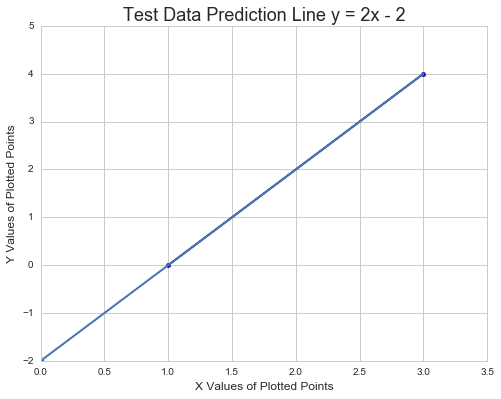

In [47]:
#Linear Regression using Scikit-Learn
#using the predictable
#test data
#which outputs the exact line y = 2x - 2

#read data from file and create dataframe
#use either the text file or the csv file
#df = pd.read_fwf('data4LinRegr1.txt')
df = pd.read_csv('C:/Users/user1/Desktop/Linear Regression/data/data1.csv')
x, y = df[['x']], df[['y']]

#train model on the data
lin_reg = linear_model.LinearRegression(normalize=True)
lin_reg.fit(x, y)

#display the graph
plt.scatter(x, y)
plt.xlim(xmin=0)
plt.ylim(ymin=-2)
plt.title("Test Data Prediction Line y = 2x - 2", fontsize=18)
plt.xlabel("X Values of Plotted Points", fontsize=12)
plt.ylabel("Y Values of Plotted Points", fontsize=12)
plt.plot(x, lin_reg.predict(x))

In [48]:
#to determine the goodness of fit,
#calculate the correlation coefficient
print("r = " + str(lin_reg.score(x,y)))

r = 1.0


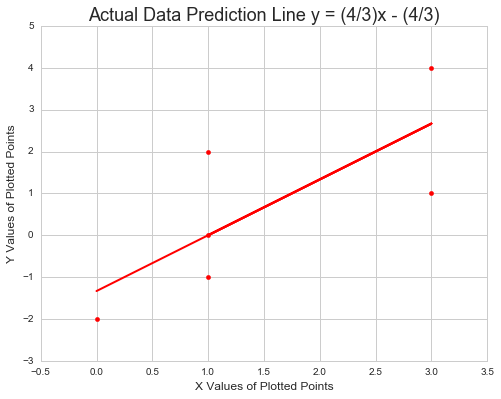

In [49]:
#Linear Regression using Scikit-Learn
#using all of the
#actual data
#which outputs the estimated line y = (4/3)x - (4/3)

#read data from file and create dataframe
#use either the text file or the csv file
#df = pd.read_fwf('data4LinRegr2.txt')
df = pd.read_csv('C:/Users/user1/Desktop/Linear Regression/data/data2.csv')
x, y = df[['x']], df[['y']]

#train model on the data
lin_reg = linear_model.LinearRegression(normalize=True)
lin_reg.fit(x, y)

#display the graph
plt.scatter(x, y, color='red')
plt.title("Actual Data Prediction Line y = (4/3)x - (4/3)", fontsize=18)
plt.xlabel("X Values of Plotted Points", fontsize=12)
plt.ylabel("Y Values of Plotted Points", fontsize=12)
plt.plot(x, lin_reg.predict(x), color='red')

In [50]:
#to determine the goodness of fit,
#calculate the correlation coefficient
print("r = " + str(lin_reg.score(x,y)))

r = 0.571428571429


In [51]:
#Linear Regression using Manual Calculation of Gradient Descent
#using the predictable
#test data
#which outputs the exact line y = 2x - 2

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - ((m * x) + b)) ** 2
    return totalError

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -2 * (y - ((m_current * x) + b_current))
        m_gradient += -2 * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("C:/Users/user1/Desktop/Linear Regression/data/data3.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 100000
    print ("Starting gradient descent at m = {0}, b = {1}, error = {2}".format(initial_m, initial_b, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations m = {1}, b = {2}, error = {3}".format(num_iterations, m, b, compute_error_for_line_given_points(b, m, points)))

run()

Starting gradient descent at m = 0, b = 0, error = 20.0
Running...
After 100000 iterations m = 1.9999999999443212, b = -1.9999999998772964, error = 2.151388134526375e-20


In [52]:
#Linear Regression using Manual Calculation of Gradient Descent
#using all of the
#actual data
#which outputs the estimated line y = (4/3)x - (4/3)

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - ((m * x) + b)) ** 2
    return totalError

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -2 * (y - ((m_current * x) + b_current))
        m_gradient += -2 * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("C:/Users/user1/Desktop/Linear Regression/data/data4.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 100000
    print ("Starting gradient descent at m = {0}, b = {1}, error = {2}".format(initial_m, initial_b, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations m = {1}, b = {2}, error = {3}".format(num_iterations, m, b, compute_error_for_line_given_points(b, m, points)))

run()

Starting gradient descent at m = 0, b = 0, error = 26.0
Running...
After 100000 iterations m = 1.3333333333331485, b = -1.333333333332964, error = 10.0
